Desafio 6: Analisando Dados de Acidentes de Trânsito
📂 Dataset: Informações sobre acidentes de trânsito, incluindo data, local, número de veículos envolvidos e gravidade do acidente.

🎯 Atividades:

Qual foi o mês com o maior número de acidentes registrados?

Qual o tipo de acidente mais frequente?

Qual o percentual de acidentes graves em relação ao total?

Crie um gráfico de barras mostrando a quantidade de acidentes por tipo.

In [105]:
import pandas as pd
import seaborn as sns

In [141]:
#testando o dataset
df = pd.read_csv("dia_6_acidentes_transito.csv")
df.head()

#adicionando a tabela de quantidade de acidentes
df["Quantidade_Acidentes"] = 1
df.head()

,ID_Acidente,Data,Local,Tipo_Acidente,Veiculos_Envolvidos,Gravidade,Quantidade_Acidentes
0,1,2024-01-01,Rodovia Central,Colisão,1,Moderado,1
1,2,2024-01-02,Rua Secundária,Colisão,4,Grave,1
2,3,2024-01-03,Rua Secundária,Atropelamento,4,Moderado,1
3,4,2024-01-03,Avenida Principal,Colisão,4,Leve,1
4,5,2024-01-03,Praça da Cidade,Capotamento,4,Leve,1


In [158]:
#Qual foi o mês com o maior número de acidentes registrados?
df["Data"] = pd.to_datetime(df["Data"]) #convertendo a coluna "Data" de string para o formato correto
df["Mes"] = df["Data"].dt.strftime("%B")
acidentesPorMes = df["Mes"].value_counts()
print(f"Quantidade de acidentes em cada mês: \n\n{acidentesPorMes.to_string()}")

Quantidade de acidentes em cada mês: 

Mes
January     7
February    4
March       4
May         3
April       2


In [162]:
#Qual o tipo de acidente mais frequente?
acidenteFrquente = df["Tipo_Acidente"].value_counts()
print(f"Acidente mais frequente: \n\n{acidenteFrquente.head(1).to_string()}")

Acidente mais frequente: 

Tipo_Acidente
Colisão    9


In [144]:
#Qual o percentual de acidentes graves em relação ao total?
acidentesGraves = df.groupby("Gravidade")["Gravidade"].count() / df["Gravidade"].count() * 100
print(f"Percentual de acidentes graves: {acidentesGraves.iloc[1]:.1f}%")

Percentual de acidentes graves: 40.0%


<Axes: xlabel='Quantidade_Acidentes', ylabel='Gravidade'>

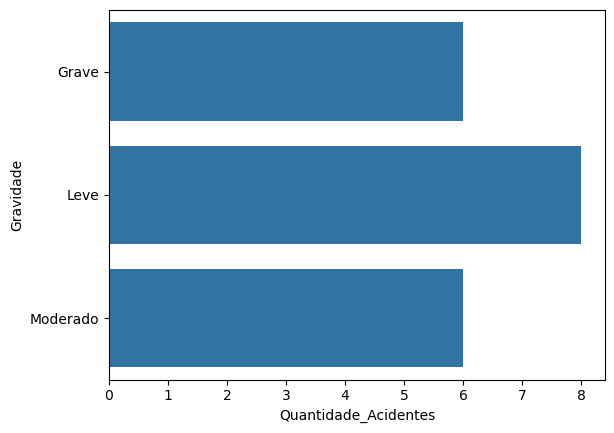

In [156]:
#Crie um gráfico de barras mostrando a quantidade de acidentes por tipo.
quantidadeTipoAcidente = df.groupby("Gravidade")["Quantidade_Acidentes"].sum().reset_index()
sns.barplot(x="Quantidade_Acidentes", y="Gravidade", data=quantidadeTipoAcidente)